<a href="https://colab.research.google.com/github/premswaroopmusti/Lets-Grow-More-VIP-Internship-July-2022/blob/main/Task%20-7/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"**
###LGMVIP July-2022

Advanced Level Task

AUTHOR :- MSSN Prem Swaroop

**TASK-7- Develop A Neural Network That Can Read Handwriting :**

Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

Dataset link : https://en.wikipedia.org/wiki/MNIST_database

**Importing Libraries**

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns



**Loading dataset**

In [37]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

**Plotting count plot**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


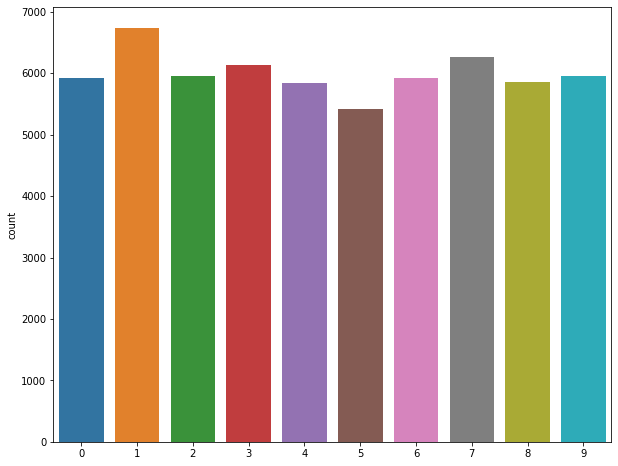

In [74]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

**Displaying Some Images**

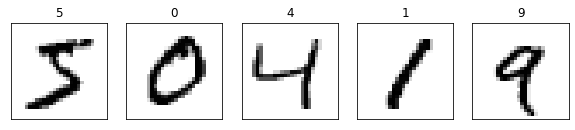

In [78]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow((tf.squeeze(x_train[i])), cmap='gray_r'),
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

**Pre-processing the data**


In [38]:
len(x_train)

60000

In [39]:
len(x_test)

10000

In [40]:
x_train[0].shape

(28, 28)

In [41]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

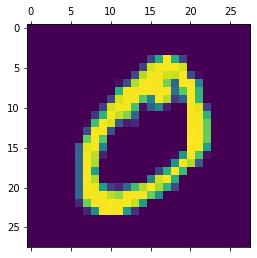

In [42]:
plt.matshow(x_train[1])

In [44]:
y_train[1]

0

In [45]:
y_train[0:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
x_test.shape

(10000, 28, 28)

In [48]:
# often in machine learing we should scale our values, we can see in our x_train that each value is in the range 0 to 255
# if we divide the whole array with 255 , it will be scaled from 0 to 1
# bcz scaling is a technique which improves accuracy of machine learning model
x_train = x_train/255
x_test = x_test/255

In [49]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [50]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1) 
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

## **Creating the model**

### Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

1. Conv2D - for the convolution layers

3. Dense - a fully connected layer

4. Softmax activation - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance


In [51]:
# so CNN have couple of layers , so that layers would be convolutional layer and then relu, and then pooling and then again convolutional then again relu and pooling and then u
# have a dense network. so we will keep the dense netowrk, but on the front of dense network we will add some convolution and pooling layer
cnn = models.Sequential([
     # we will have some CNN layers here
     layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
     layers.MaxPooling2D((2,2)),

     layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     # and this will be ur dense network
    layers.Flatten(),# when u r in the middle layer u don't need to specify the input shape, bcz the network will figure it out automatically
    layers.Dense(64, activation = 'relu'), # i am going to keep only one dense network, bcz cnn would have done most of the work,so we dont need so many neurons and so many deep layers 
    layers.Dense(10, activation = 'softmax') # softmax will normalize ur probability in a range between 0 and 1                   
])

In [57]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

**Training the model**


In [52]:
cnn.compile(optimizer =  'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [54]:
cnn.fit(x_train,y_train,epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 5/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0087 - accuracy: 0.9969
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0070 - accuracy: 0.9978
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 8/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0054 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 55s 29m

**Saving and loading the model**

In [60]:
cnn.save('MNproject.h5')
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

**Evaluating the model**

In [62]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0463 - accuracy: 0.9909
Test Loss 0.04632064700126648
Test Accuracy 0.9908999800682068


In [64]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    1,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1133,    1,    0,    0,    1,    0,    0,    0,    0],
       [   0,    3, 1021,    1,    0,    0,    0,    7,    0,    0],
       [   0,    0,    0, 1005,    0,    4,    0,    0,    1,    0],
       [   0,    1,    2,    0,  974,    0,    0,    0,    0,    5],
       [   0,    0,    1,    4,    0,  885,    1,    0,    1,    0],
       [   2,    2,    0,    0,    2,    3,  949,    0,    0,    0],
       [   0,    4,    5,    0,    0,    0,    0, 1017,    0,    2],
       [   3,    3,    2,    2,    0,    2,    0,    2,  958,    2],
       [   1,    1,    0,    2,    7,    7,    0,    0,    0,  991]],
      dtype=int32)>

**Plotting heat map**

Text(69.0, 0.5, 'Truth')

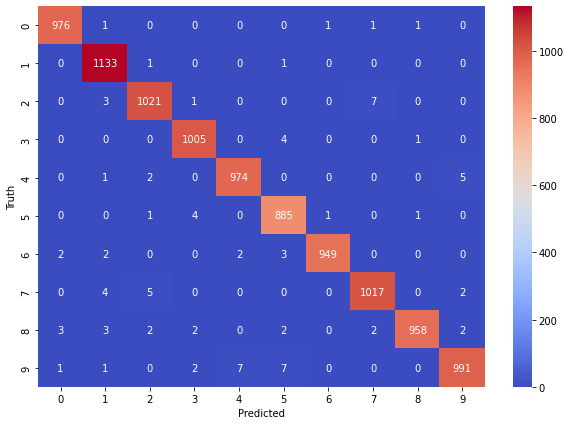

In [67]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Testing the model**

predicted value 4
Successful prediction


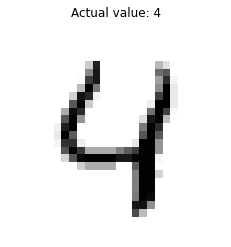

In [72]:
plt.imshow((tf.squeeze(x_test[4])),cmap = 'gray_r')
plt.title('Actual value: {}'.format(y_test[4]))
prediction = model.predict(x_test)

plt.axis('off')
print('predicted value', np.argmax(prediction[4]))
if(y_test[4] == np.argmax(prediction[4])):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

predicted value 9
Successful prediction


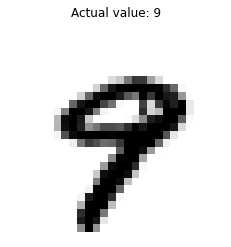

In [73]:
plt.imshow((tf.squeeze(x_test[9])),cmap = 'gray_r')
plt.title('Actual value: {}'.format(y_test[9]))
prediction = model.predict(x_test)

plt.axis('off')
print('predicted value', np.argmax(prediction[9]))
if(y_test[9] == np.argmax(prediction[9])):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')


**Thank you!**